In [2]:
import numpy as np
import pandas as pd

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv("Movie_Id_Titles")

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df,movie_titles,on='item_id')

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [11]:
 df.groupby('title')['rating'].median().sort_values(ascending=False).head()

title
Shall We Dance? (1996)                               5.0
Faust (1994)                                         5.0
Star Wars (1977)                                     5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Godfather, The (1972)                                5.0
Name: rating, dtype: float64

In [17]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [18]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [15]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())


In [16]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


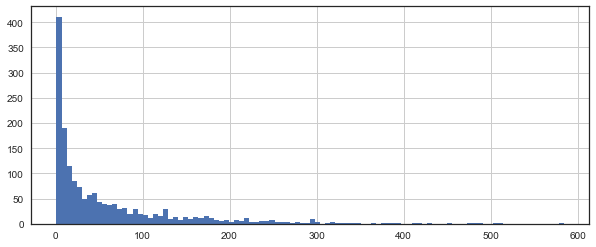

In [20]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=100)

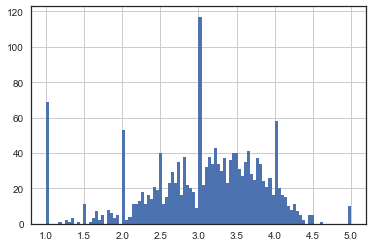

In [21]:
ratings['rating'].hist(bins=100)

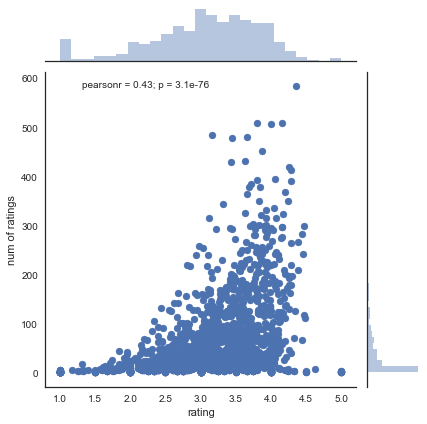

In [24]:
sns.jointplot(x='rating', y='num of ratings', data=ratings)

In [26]:
moviemat = df.pivot_table(index='user_id', columns='title',values='rating')

In [27]:
moviemat


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [33]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Star Trek: First Contact (1996)]


In [34]:
starwars_user_ratings.corr(liarliar_user_ratings)

0.15029176850357889

In [42]:
similarToStarWars = moviemat.corrwith(starwars_user_ratings)
similarToStarWars['Star Trek: First Contact (1996)']

C:\Users\OmSai\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\OmSai\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


0.25552913932512544

In [43]:
similarToStarWars

title
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)        

In [46]:
corr_StarWars = pd.DataFrame(similarToStarWars, columns=['Correlation'])

In [48]:
corr_StarWars.dropna(inplace=True)

In [49]:
corr_StarWars


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [51]:
corr_StarWars.sort_values('Correlation', ascending=False)

,Correlation
title,
Commandments (1997),1.000000
Cosi (1996),1.000000
No Escape (1994),1.000000
Stripes (1981),1.000000
Man of the Year (1995),1.000000
Hollow Reed (1996),1.000000
"Beans of Egypt, Maine, The (1994)",1.000000
"Good Man in Africa, A (1994)",1.000000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000


In [55]:
corr_StarWars =corr_StarWars.join(ratings['num of ratings'])

In [57]:
corr_StarWars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [62]:
corr_StarWars[corr_StarWars['num of ratings'] > 100].sort_values('Correlation', ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
